In [2]:
#imports
import pywt
import pandas as pd
import numpy as np
from scipy.signal import cwt, ricker, wavelets


In [3]:
emgdata_df=pd.read_csv('EMG-data.csv')

In [4]:
#wavelet transform function
def wavelet_filter_signal_single_channel(signal, Threshold, wavelet, Mode, Level):
    threshold = Threshold
    coeffs = pywt.wavedec(signal, wavelet, level=Level)
    coeffs_thresh = [pywt.threshold(c, threshold, mode=Mode) for c in coeffs]
    denoised_signal = pywt.waverec(coeffs_thresh, wavelet)

    return denoised_signal

In [5]:
#drop last two columns as we dont need class and labels
emgdata_df=emgdata_df.drop(emgdata_df.columns[-1:], axis=1)
emgdata_df=emgdata_df[:100000]
emgdata_df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


array([<Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>],
      dtype=object)

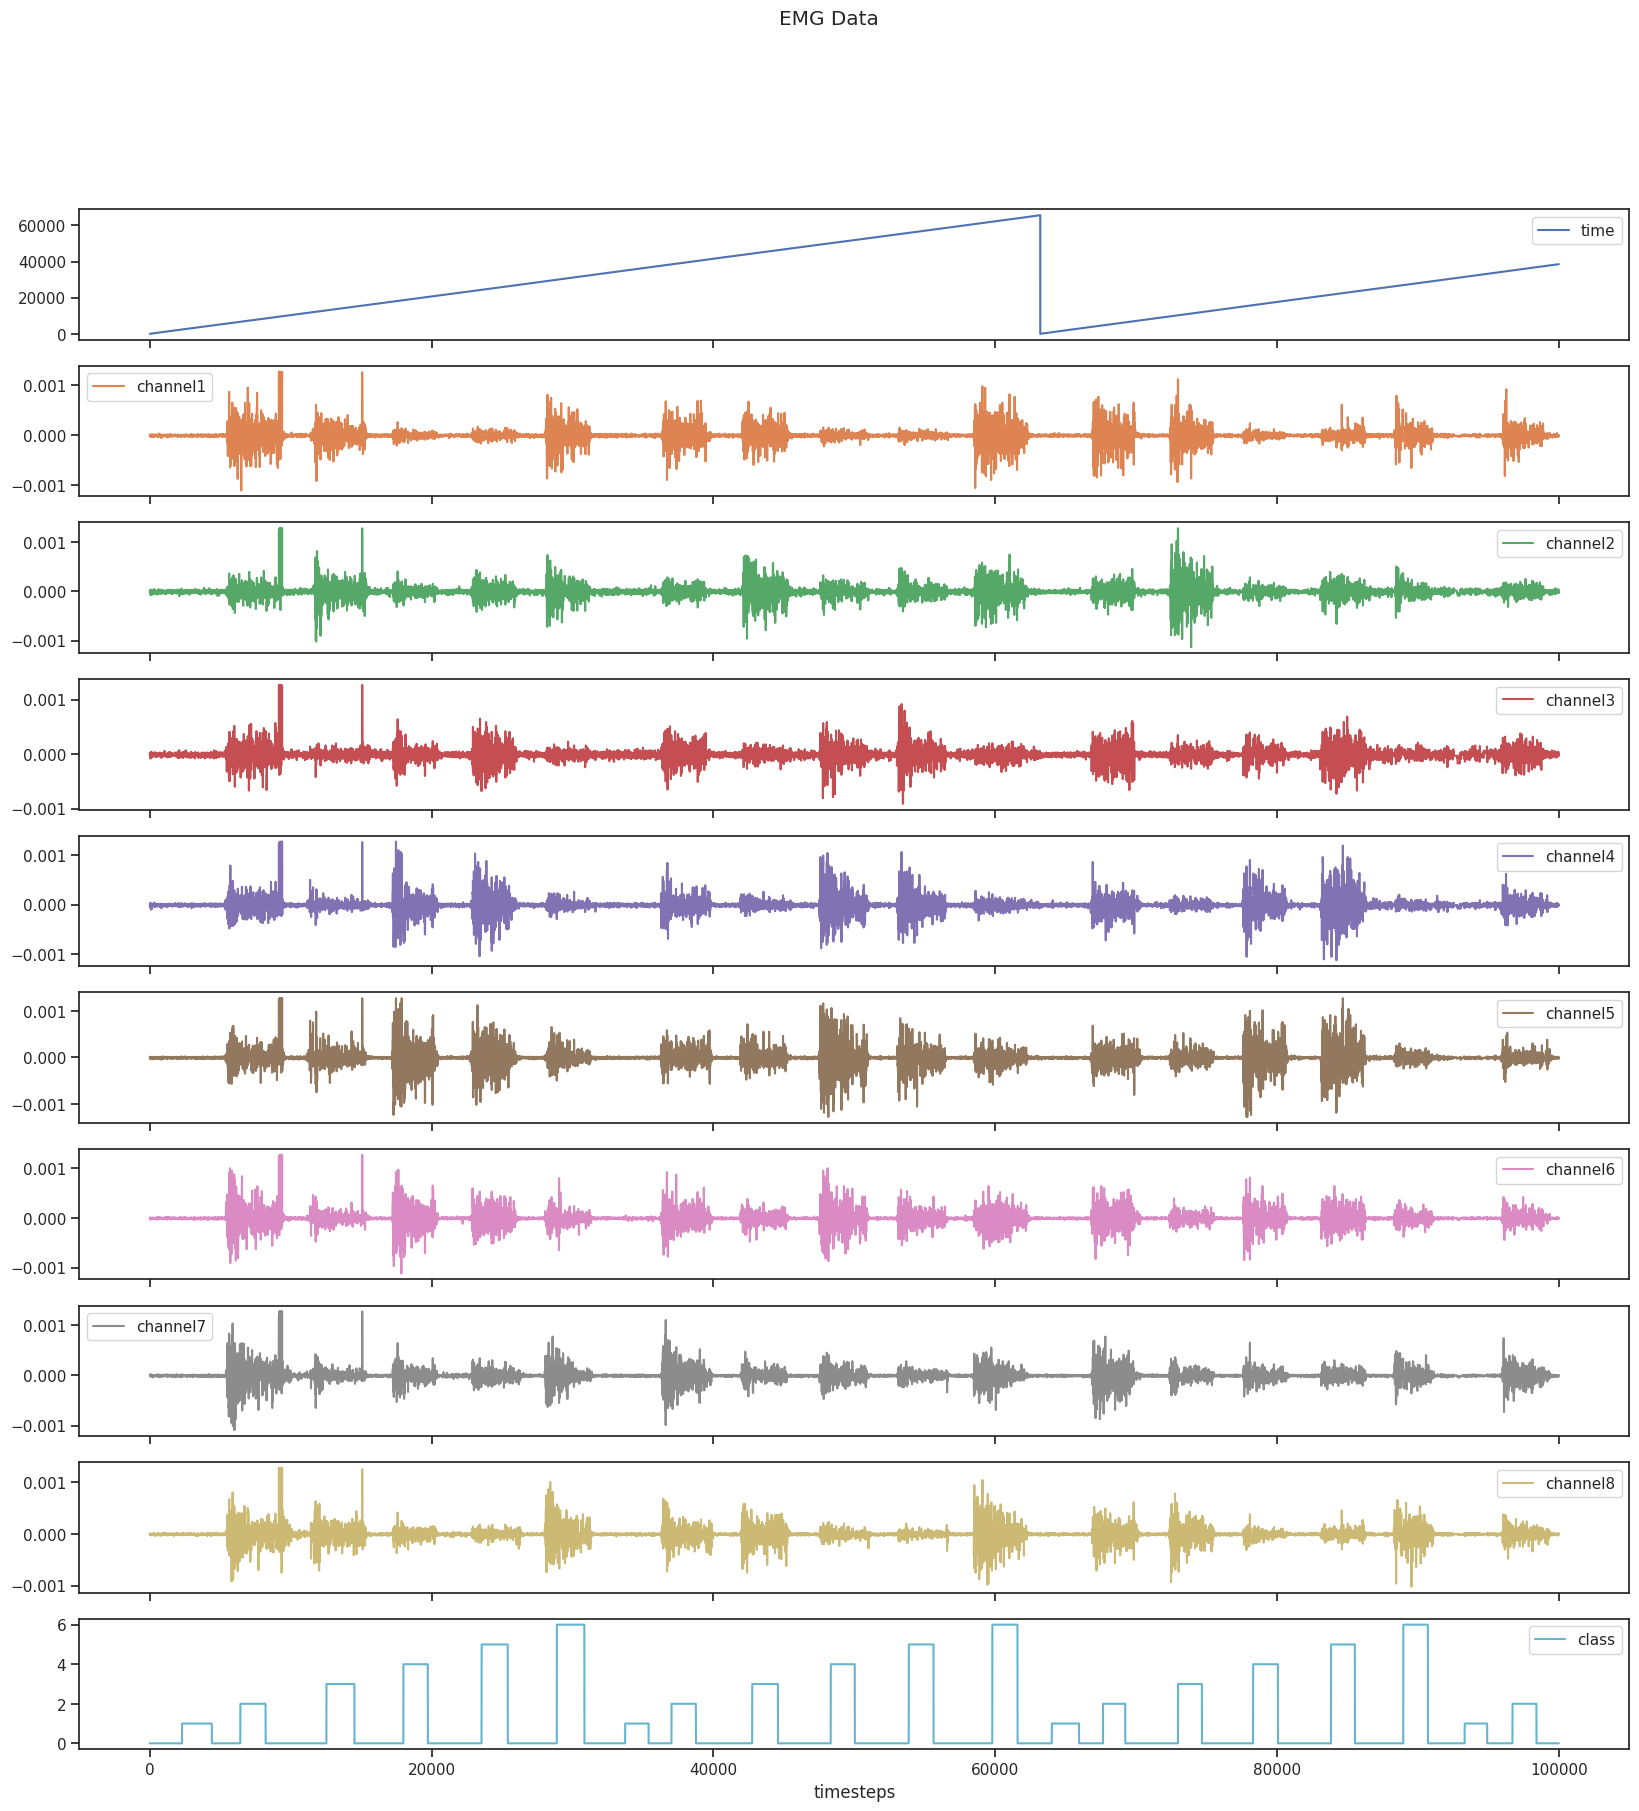

In [6]:
#plot first channel
emgdata_df.plot(subplots=True, figsize=(20,20), xlabel='timesteps', title='EMG Data')

<ipython-input-7-0d1a6d568fd5>:9: DeprecationWarning: Please use `daub` from the `scipy.signal` namespace, the `scipy.signal.wavelets` namespace is deprecated.
  db4 = wavelets.daub(4)


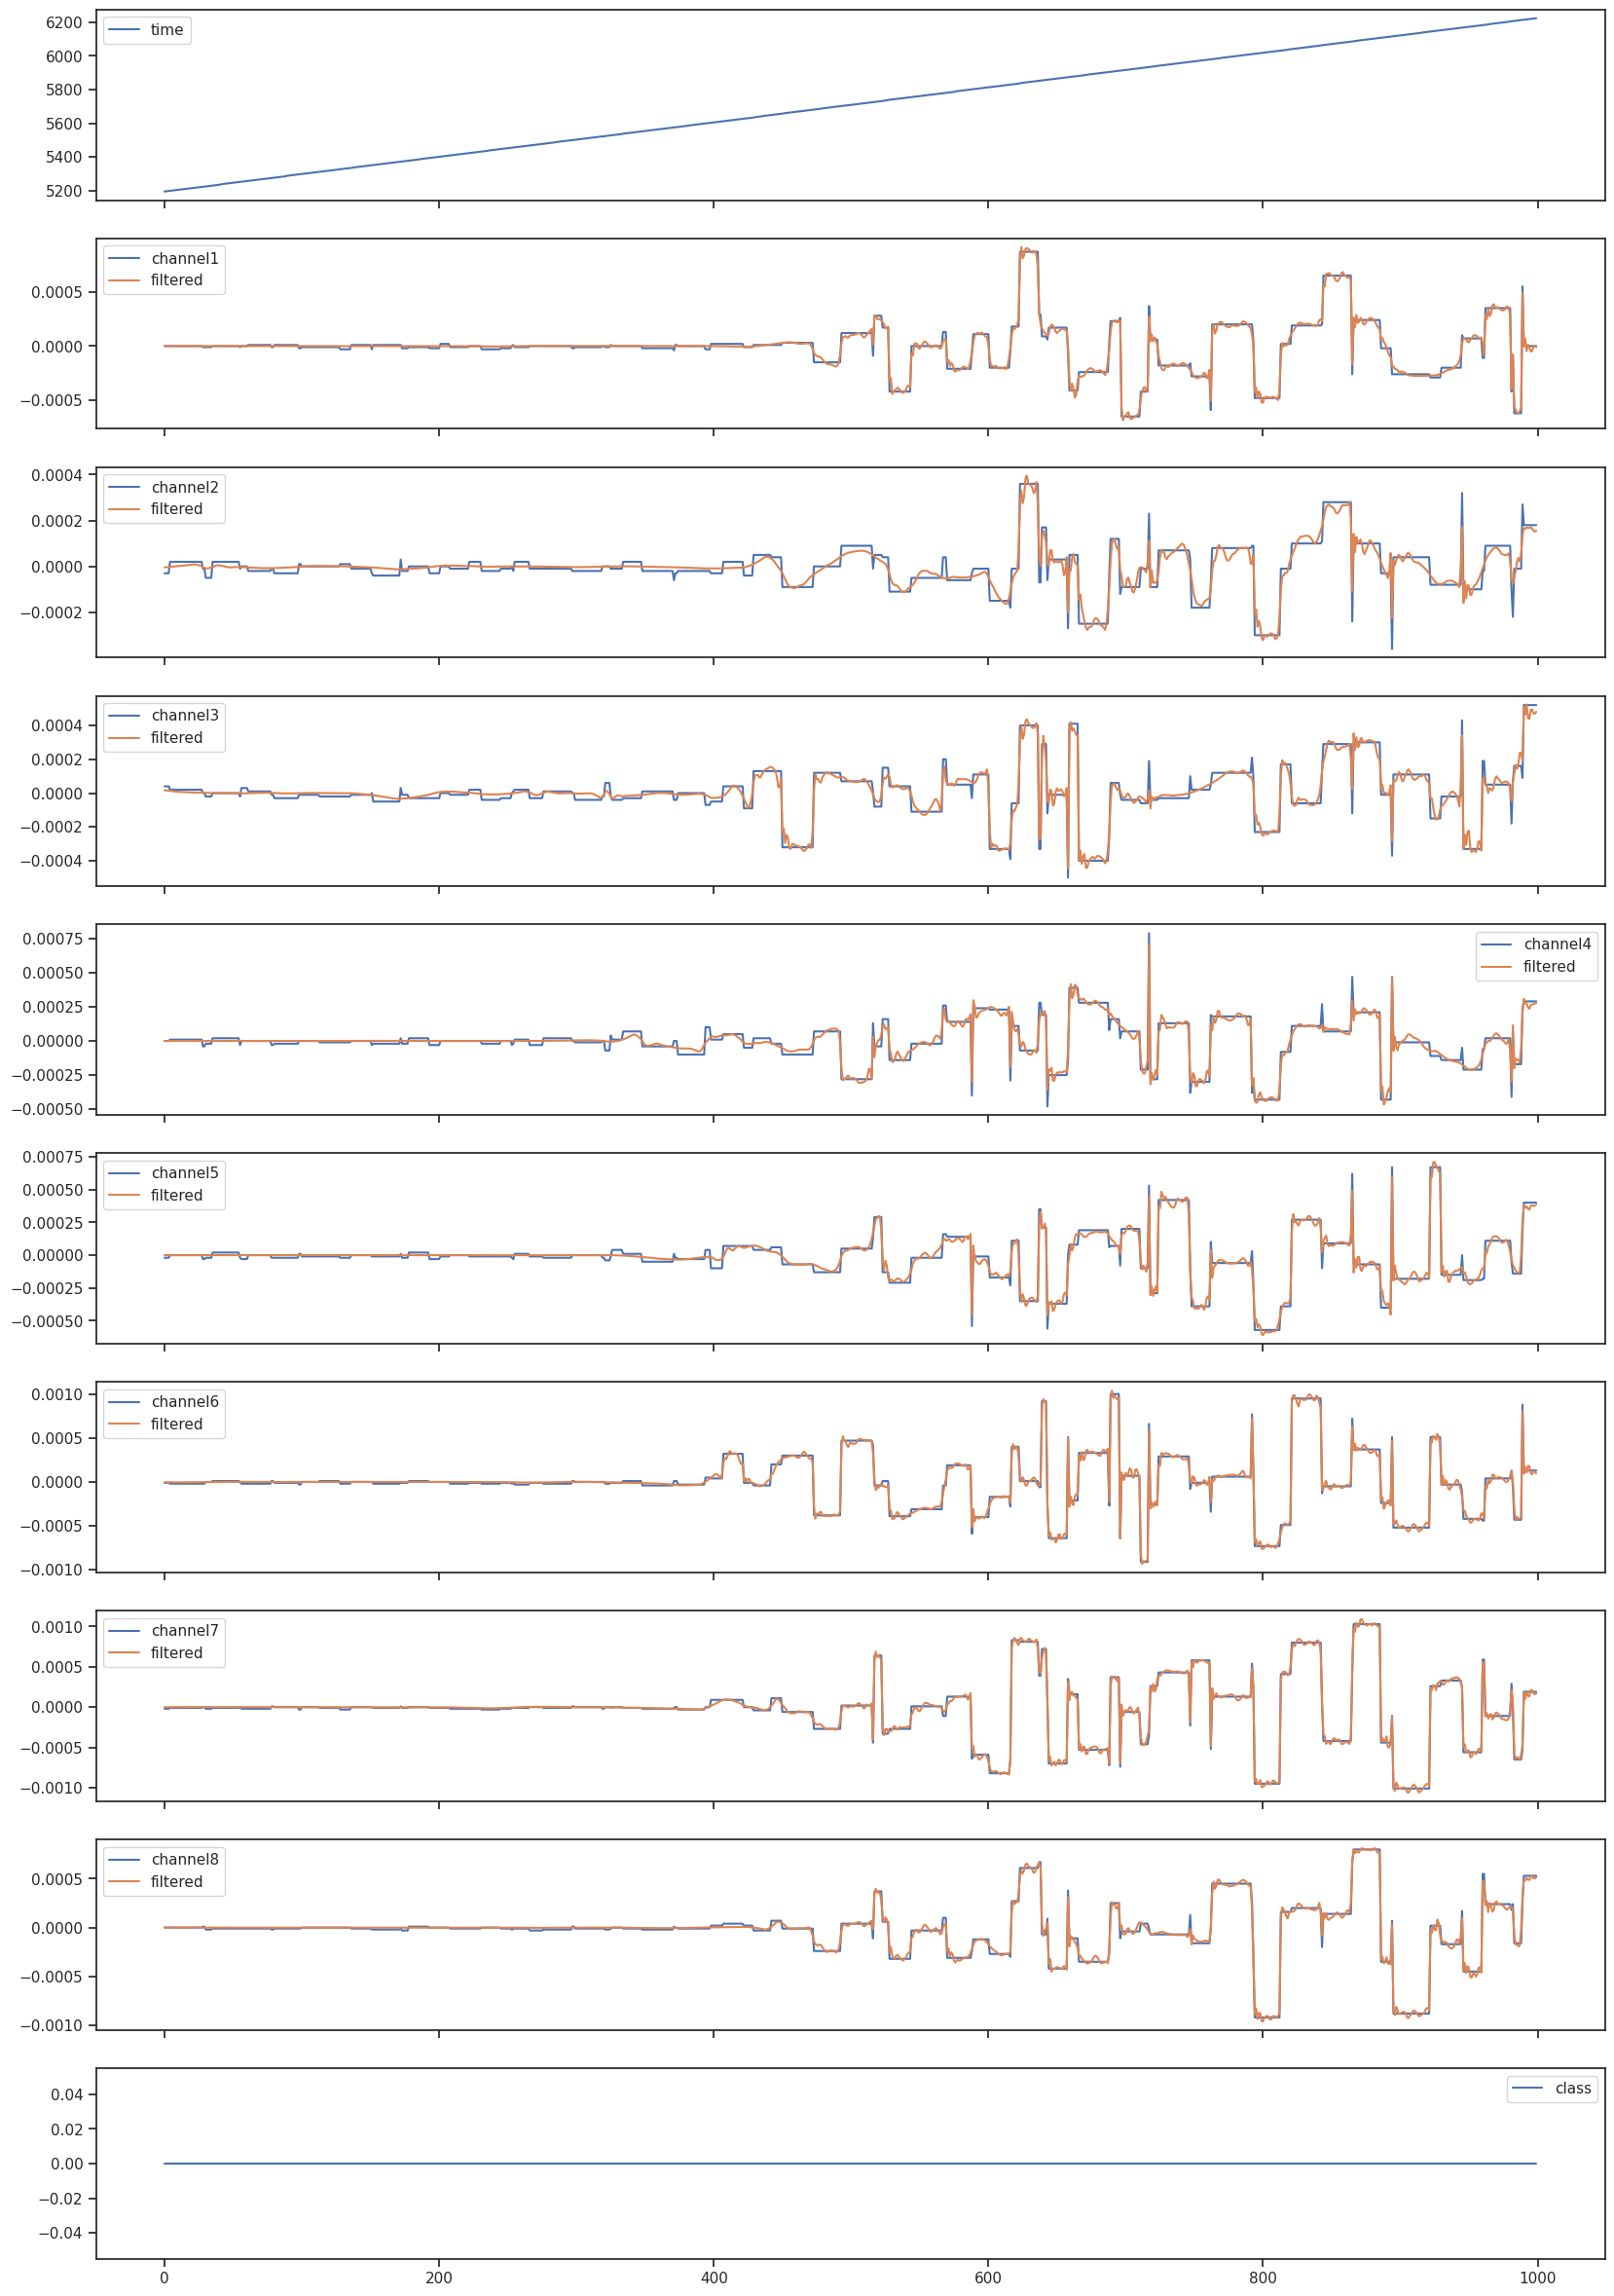

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
#plot all data
fig, axs = plt.subplots(len(emgdata_df.columns), 1, figsize=(20, 30), sharex=True)
num_samples = 1000
start = 5000
end = start + num_samples
db4 = wavelets.daub(4)

for i in range(len(emgdata_df.columns)):
    axs[i].plot(np.array(emgdata_df)[start:end,i], label=emgdata_df.columns[i])
    if i != 0 and i != len(emgdata_df.columns)-1:
        axs[i].plot(wavelet_filter_signal_single_channel(np.array(emgdata_df)[start:end,i], .0001, 'db4', 'garrote', 5), label='filtered')
    axs[i].legend()
